In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../imports/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


##Panel B <br>
Data requirements: PBR matrix, mutation matrix

In [3]:
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_affinities.cancer.PHBR.csv', index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_mutations.cancer.PHBR.csv', index_col=0)

In [4]:
acquired_cancer, not_acquired_cancer = [], []
for i, patient in enumerate(list(patient_mutations.index)):
    acquired = list(patient_mutations.ix[patient][patient_mutations.ix[patient] == 1].index)
    not_acquired = list(patient_mutations.ix[patient][patient_mutations.ix[patient] == 0].index)
    acquired_cancer.extend((list(patient_affinities.ix[patient, acquired])))
    not_acquired_cancer.extend((list(patient_affinities.ix[patient, not_acquired])))

In [5]:
plotting_df = pd.DataFrame({'PBR': acquired_cancer + not_acquired_cancer,
                           'Mutation': [1 for x in acquired_cancer] + [0 for x in not_acquired_cancer]})

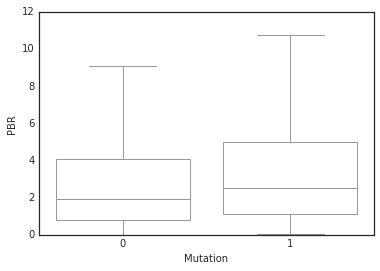

In [8]:
sns.set_style('white')
ax = sns.boxplot(x='Mutation', y='PBR', data=plotting_df, showfliers=False, color='white')
ax.grid(False)
#plt.ylim(0, 6)

## Panel F <br>
Data requirements: Passenger PBR matrix, Passenger mutation matrix, Germline PBR matrix, Germline mutation matrix

In [11]:
# passenger matrices
patient_affinities_passenger = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_affinities.passenger.PHBR.csv', index_col=0)
patient_mutations_passenger = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_mutations.passenger.PHBR.csv', index_col=0)
# germline matrices
patient_affinities_germline = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_affinities.germline.PHBR.csv', index_col=0)
patient_mutations_germline = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_mutations.germline.PHBR.csv', index_col=0)

In [ ]:
acquired_passenger, not_acquired_passenger = [], []
for i, patient in enumerate(list(patient_mutations_passenger.index)):
    acquired = list(patient_mutations_passenger.ix[patient][patient_mutations_passenger.ix[patient] == 1].index)
    not_acquired = list(patient_mutations_passenger.ix[patient][patient_mutations_passenger.ix[patient] == 0].index)
    acquired_passenger.extend((list(patient_affinities_passenger.ix[patient, acquired])))
    not_acquired_passenger.extend((list(patient_affinities_passenger.ix[patient, not_acquired])))

In [ ]:
acquired_germline, not_acquired_germline = [], []
for i, patient in enumerate(list(patient_mutations_germline.index)):
    acquired = list(patient_mutations_germline.ix[patient][patient_mutations_germline.ix[patient] == 1].index)
    not_acquired = list(patient_mutations_germline.ix[patient][patient_mutations_germline.ix[patient] == 0].index)
    acquired_germline.extend((list(patient_affinities_germline.ix[patient, acquired])))
    not_acquired_germline.extend((list(patient_affinities_germline.ix[patient, not_acquired])))

In [ ]:
plotting_df = pd.DataFrame({'PBR': acquired_passenger + not_acquired_passenger + acquired_germline + not_acquired_germline,
                           'Mutation': [1 for x in acquired_passenger] + [0 for x in not_acquired_passenger] + [1 for x in acquired_germline] + [0 for x in not_acquired_germline],
                           'Category': ['Passenger' for x in acquired_passenger + not_acquired_passenger] + ['Germline' for x in acquired_germline + not_acquired_germline]})

In [ ]:
sns.boxplot(x='Category', y='PBR', hue='Mutation', data=plotting_df, showfliers=False, color='w')
#plt.ylim(0, 6)
plt.xlabel('')